## Imports

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from numpy import linalg as LA

## Constants

In [2]:
L = 1.0                            # length of the rod (m)
A = 0.00001                        # cross-sectional area of the rod (m^2)
rho = 1600                         # density of the rod (kg/m^3)
E = 2e11                           # Young's modulus of the rod (Pa)
c = np.sqrt((E*1e-6) / (rho*1e-3)) # wave speed (m/s)

## Functions / Plotting

In [3]:
def get_displacement(L, dx, scale_param):
    """ 
    Returns the displacement and initial u matrix
    """
    x = np.arange(0, scale_param*L + dx, dx)
    u = np.zeros_like(x)
    u[1:-1] = np.sin(np.pi * x[1:-1] / L)
    return u, x

def f_true(u, t):
    """ 
    Returns the f_true function which is the 2nd derivative w.r.t. x using the central difference method
    """
    d2u_dx2 = np.zeros_like(u)
    for i in range(1, len(d2u_dx2) - 1):
        d2u_dx2[i] = (u[i+1] - 2*u[i] + u[i-1]) / dx**2
    return c**2 * d2u_dx2 - E*A/rho * u

def RK4(u, t, dx, dt):
    """ 
    Returns the u matrix at the next time step via the RK4 method
    """
    k1 = dt * f_true(u, t)
    k2 = dt * f_true(u + k1/2, t + dt/2)
    k3 = dt * f_true(u + k2/2, t + dt/2)
    k4 = dt * f_true(u + k3, t + dt)
    return u + 1/6 * (k1 + 2*k2 + 2*k3 + k4)

def get_final_u(u_init, dx, dt, t):
    """ 
    Returns the final u matrix after the final time step in the simulation
    """
    for i in range(int(t / dt)):
        u = RK4(u_init, i * dt, dx, dt)
    return u

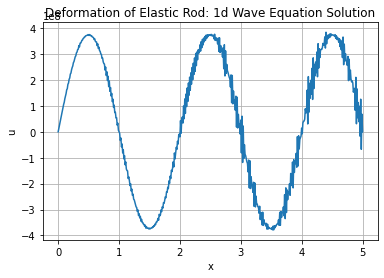

In [4]:
dx = 0.01
dt = 0.00025
sim_T = 0.01

u_initial, x_final = get_displacement(L, dx, scale_param = 5)
u_final = get_final_u(u_initial, dx, dt, sim_T)

plt.plot(x_final, u_final)
plt.xlabel('x')
plt.ylabel('u')
plt.title('Deformation of Elastic Rod: 1d Wave Equation Solution')
plt.grid()
plt.show()

## Error / Plotting

In [ ]:
print(u_final)